In [1]:
#!pip install pandoc
#!pip install nbconvert

 # Linear Regression models to predict the pricing of a certain used cars make


# 2. Library import and data loading

In [2]:
#reading the file
import pandas as pd
import numpy as np
df=pd.read_csv("unclean_data.csv")

# 3. Data Analysis, Preparation and Wrangling

## Handling missing rows

In [3]:
#To delete the rows where all values are missing (rows that have all NaN)
df.dropna(how='all', inplace=True)
df.reset_index(drop=True)
#df.info()

,model,year,price,transmission,mileage,fuel type,engine size,mileage2,fuel type2,engine size2,reference
0,C Class,2020.0,"£30,495",Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,"£29,989",Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,"£37,899",Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,"£30,399",Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,"£29,899",Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
3902,C Class,2017.0,"£14,700",Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
3903,C Class,2018.0,"£18,500",Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
3904,C Class,2014.0,"£11,900",Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
3905,C Class,2014.0,"£11,300",Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


## Handling the currency symbols and comma format in 'price' column

In [4]:
# Replace currency symbols with empty space using lambda
df.price = df.price.apply(lambda x:x.replace('£','').replace(',',''))
# To convert price into numeric
df["price"] = pd.to_numeric(df["price"])
#df.info()
#df

In [5]:
#check coulmns types 
df.dtypes

model            object
year            float64
price             int64
transmission     object
mileage          object
fuel type        object
engine size      object
mileage2         object
fuel type2       object
engine size2     object
reference        object
dtype: object

## Handling non-valid column names

In [6]:
# To rename: “fuel type”, “fuel type2”, “engine size”, and “engine size2” into “fuel_type”, 
#“fuel_type2”, “engine_size” and “engine_size2”
# into “fuel_type”, “fuel_type2”, “engine_size” and “engine_size2” respectively.
df.rename(columns={'fuel type': 'fuel_type', 
                   'fuel type2': 'fuel_type2', 
                   'engine size': 'engine_size', 
                   'engine size2': 'engine_size2'}, inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3907 entries, 0 to 4005
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3907 non-null   object 
 1   year          3904 non-null   float64
 2   price         3907 non-null   int64  
 3   transmission  3907 non-null   object 
 4   mileage       3808 non-null   object 
 5   fuel_type     1329 non-null   object 
 6   engine_size   3842 non-null   object 
 7   mileage2      3890 non-null   object 
 8   fuel_type2    3808 non-null   object 
 9   engine_size2  3808 non-null   object 
 10  reference     3907 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 366.3+ KB


,model,year,price,transmission,mileage,fuel_type,engine_size,mileage2,fuel_type2,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,Diesel,2,"1,200",NaN,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,Petrol,1.5,"1,000",NaN,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,Diesel,2,500,NaN,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,Diesel,2,"5,000",NaN,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,Diesel,2,"4,500",NaN,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...,...
4001,C Class,2017.0,14700,Manual,"31,357",25,£150,70.6,Diesel,1.598,/ad/25451436
4002,C Class,2018.0,18500,Automatic,"28,248",31,£150,64.2,Diesel,2.143,/ad/25451481
4003,C Class,2014.0,11900,Manual,"48,055",31,£20,65.7,Diesel,2.143,/ad/25057204
4004,C Class,2014.0,11300,Automatic,"49,865",46,£145,56.5,Diesel,2.143,/ad/25144481


# Handling missing values in columns: fuel_type

In [7]:
# To fill the missing values in fuel_types2 column with values from column fuel_type
df.fuel_type2 = df.fuel_type2.fillna(df.fuel_type)

# To drop fuel_type
df.drop('fuel_type', axis = 1, inplace=True)

#reset index
df.reset_index(drop=True)

# To rename fuel_type2 to fuel_type
df.rename(columns={'fuel_type2': 'fuel_type'}, inplace=True)
df.info()
df


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3907 entries, 0 to 4005
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3907 non-null   object 
 1   year          3904 non-null   float64
 2   price         3907 non-null   int64  
 3   transmission  3907 non-null   object 
 4   mileage       3808 non-null   object 
 5   engine_size   3842 non-null   object 
 6   mileage2      3890 non-null   object 
 7   fuel_type     3907 non-null   object 
 8   engine_size2  3808 non-null   object 
 9   reference     3907 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 335.8+ KB


,model,year,price,transmission,mileage,engine_size,mileage2,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,NaN,2,"1,200",Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,NaN,1.5,"1,000",Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,NaN,2,500,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,NaN,2,"5,000",Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,NaN,2,"4,500",Diesel,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...,...
4001,C Class,2017.0,14700,Manual,"31,357",£150,70.6,Diesel,1.598,/ad/25451436
4002,C Class,2018.0,18500,Automatic,"28,248",£150,64.2,Diesel,2.143,/ad/25451481
4003,C Class,2014.0,11900,Manual,"48,055",£20,65.7,Diesel,2.143,/ad/25057204
4004,C Class,2014.0,11300,Automatic,"49,865",£145,56.5,Diesel,2.143,/ad/25144481


# Normalization of Mileage Column 

In [8]:
#To fill the missing values in mileage column with values from column mileage 2
df.mileage = df.mileage.fillna(df.mileage2)

# # Replace comma character with empty space
df['mileage'] = df['mileage'].str.replace(',', '', regex=True)

# # To find and drop the row contains 'Unknown'
df.loc[df['mileage']=='Unknown'].index
df.drop(df.loc[df['mileage']=='Unknown'].index, inplace=True)

# To convert mileage into numeric
df["mileage"] = pd.to_numeric(df["mileage"])

# To drop mileage2
df.drop('mileage2', axis=1, inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3903 entries, 0 to 4005
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3903 non-null   object 
 1   year          3900 non-null   float64
 2   price         3903 non-null   int64  
 3   transmission  3903 non-null   object 
 4   mileage       3903 non-null   int64  
 5   engine_size   3839 non-null   object 
 6   fuel_type     3903 non-null   object 
 7   engine_size2  3805 non-null   object 
 8   reference     3903 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 304.9+ KB


,model,year,price,transmission,mileage,engine_size,fuel_type,engine_size2,reference
0,C Class,2020.0,30495,Automatic,1200,2,Diesel,NaN,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000,1.5,Petrol,NaN,/ad/25043746
2,C Class,2020.0,37899,Automatic,500,2,Diesel,NaN,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000,2,Diesel,NaN,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500,2,Diesel,NaN,/ad/24913660
...,...,...,...,...,...,...,...,...,...
4001,C Class,2017.0,14700,Manual,31357,£150,Diesel,1.598,/ad/25451436
4002,C Class,2018.0,18500,Automatic,28248,£150,Diesel,2.143,/ad/25451481
4003,C Class,2014.0,11900,Manual,48055,£20,Diesel,2.143,/ad/25057204
4004,C Class,2014.0,11300,Automatic,49865,£145,Diesel,2.143,/ad/25144481


# Normalizing engine size column

In [9]:
# To fill the missing values in engine_size2 column with values from column engine_size
df.engine_size2 = df.engine_size2.fillna(df.engine_size)

df.engine_size2 = df.engine_size2.str.replace('\W', '', regex=True)
df.engine_size2 = df.engine_size2.str.replace('CC', '', regex=True)

# To find and drop the row contains 'Unknown'
df.loc[df['engine_size2']=='Unknown'].index
df.drop(df.loc[df['engine_size2']=='Unknown'].index, inplace=True)


# To convert engine_size2 into numeric
df['engine_size2'] = pd.to_numeric(df['engine_size2'], errors='coerce')
df['engine_size2'] = df['engine_size2'].astype(float)


# To standardize its engine_size2
temp_col = df['engine_size2'].apply(lambda x: round(x/1000,1) if x > 1000 else round(x,1))
df['engine_size2'] = temp_col


# To drop engine_size
df.drop('engine_size', axis=1, inplace=True)

# To rename engine_size2 to engine_size
df.rename(columns={'engine_size2': 'engine_size'}, inplace=True)

df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3902 entries, 0 to 4005
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3902 non-null   object 
 1   year          3899 non-null   float64
 2   price         3902 non-null   int64  
 3   transmission  3902 non-null   object 
 4   mileage       3902 non-null   int64  
 5   fuel_type     3902 non-null   object 
 6   engine_size   3902 non-null   float64
 7   reference     3902 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 274.4+ KB


,model,year,price,transmission,mileage,fuel_type,engine_size,reference
0,C Class,2020.0,30495,Automatic,1200,Diesel,2.0,/ad/25017331
1,C Class,2020.0,29989,Automatic,1000,Petrol,15.0,/ad/25043746
2,C Class,2020.0,37899,Automatic,500,Diesel,2.0,/ad/25142894
3,C Class,2019.0,30399,Automatic,5000,Diesel,2.0,/ad/24942816
4,C Class,2019.0,29899,Automatic,4500,Diesel,2.0,/ad/24913660
...,...,...,...,...,...,...,...,...
4001,C Class,2017.0,14700,Manual,31357,Diesel,1.6,/ad/25451436
4002,C Class,2018.0,18500,Automatic,28248,Diesel,2.1,/ad/25451481
4003,C Class,2014.0,11900,Manual,48055,Diesel,2.1,/ad/25057204
4004,C Class,2014.0,11300,Automatic,49865,Diesel,2.1,/ad/25144481


# Changing datatype of year

In [10]:
# Drop remaining NaN
df.dropna(subset=['year'], inplace = True) #drop NaN value in year column

# df.dropna(how= "any", inplace= True, axis = 0) # Drop remaining NaN values
# df

#To change the data type of the year column into integer
#formatting year column as int64
df['year'] = df['year'].apply(np.int64)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3899 entries, 0 to 4005
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         3899 non-null   object 
 1   year          3899 non-null   int64  
 2   price         3899 non-null   int64  
 3   transmission  3899 non-null   object 
 4   mileage       3899 non-null   int64  
 5   fuel_type     3899 non-null   object 
 6   engine_size   3899 non-null   float64
 7   reference     3899 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 274.1+ KB


,model,year,price,transmission,mileage,fuel_type,engine_size,reference
0,C Class,2020,30495,Automatic,1200,Diesel,2.0,/ad/25017331
1,C Class,2020,29989,Automatic,1000,Petrol,15.0,/ad/25043746
2,C Class,2020,37899,Automatic,500,Diesel,2.0,/ad/25142894
3,C Class,2019,30399,Automatic,5000,Diesel,2.0,/ad/24942816
4,C Class,2019,29899,Automatic,4500,Diesel,2.0,/ad/24913660
...,...,...,...,...,...,...,...,...
4001,C Class,2017,14700,Manual,31357,Diesel,1.6,/ad/25451436
4002,C Class,2018,18500,Automatic,28248,Diesel,2.1,/ad/25451481
4003,C Class,2014,11900,Manual,48055,Diesel,2.1,/ad/25057204
4004,C Class,2014,11300,Automatic,49865,Diesel,2.1,/ad/25144481


## Handling unneeded columns

In [11]:
# To drop the model and reference columns.

df.drop(['model','reference'], axis=1, inplace=True)
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3899 entries, 0 to 4005
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          3899 non-null   int64  
 1   price         3899 non-null   int64  
 2   transmission  3899 non-null   object 
 3   mileage       3899 non-null   int64  
 4   fuel_type     3899 non-null   object 
 5   engine_size   3899 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 213.2+ KB


,year,price,transmission,mileage,fuel_type,engine_size
0,2020,30495,Automatic,1200,Diesel,2.0
1,2020,29989,Automatic,1000,Petrol,15.0
2,2020,37899,Automatic,500,Diesel,2.0
3,2019,30399,Automatic,5000,Diesel,2.0
4,2019,29899,Automatic,4500,Diesel,2.0
...,...,...,...,...,...,...
4001,2017,14700,Manual,31357,Diesel,1.6
4002,2018,18500,Automatic,28248,Diesel,2.1
4003,2014,11900,Manual,48055,Diesel,2.1
4004,2014,11300,Automatic,49865,Diesel,2.1


# Making copies and changing categoriacal values into numerical of (transmission,fuel type) column

In [12]:
# change the categorical data into dummy values that indicates the absence or presence of a feature with a 0 or 1.
transmission = pd.get_dummies(df['transmission'])
fuel_type = pd.get_dummies(df['fuel_type'])
fuel_type = fuel_type.rename(columns={'Other': 'fuel_type_Other'})

# To join transmission and fuel_type
df = df.join([transmission, fuel_type])

# Drop both transmission and fuel_type columns
df = df.drop(['transmission', 'fuel_type'], axis=1)

df.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3899 entries, 0 to 4005
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             3899 non-null   int64  
 1   price            3899 non-null   int64  
 2   mileage          3899 non-null   int64  
 3   engine_size      3899 non-null   float64
 4   Automatic        3899 non-null   uint8  
 5   Manual           3899 non-null   uint8  
 6   Other            3899 non-null   uint8  
 7   Semi-Auto        3899 non-null   uint8  
 8   Diesel           3899 non-null   uint8  
 9   Hybrid           3899 non-null   uint8  
 10  fuel_type_Other  3899 non-null   uint8  
 11  Petrol           3899 non-null   uint8  
dtypes: float64(1), int64(3), uint8(8)
memory usage: 311.8 KB


,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,fuel_type_Other,Petrol
0,2020,30495,1200,2.0,1,0,0,0,1,0,0,0
1,2020,29989,1000,15.0,1,0,0,0,0,0,0,1
2,2020,37899,500,2.0,1,0,0,0,1,0,0,0
3,2019,30399,5000,2.0,1,0,0,0,1,0,0,0
4,2019,29899,4500,2.0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4001,2017,14700,31357,1.6,0,1,0,0,1,0,0,0
4002,2018,18500,28248,2.1,1,0,0,0,1,0,0,0
4003,2014,11900,48055,2.1,0,1,0,0,1,0,0,0
4004,2014,11300,49865,2.1,1,0,0,0,1,0,0,0


In [13]:
df.describe()

,year,price,mileage,engine_size,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,fuel_type_Other,Petrol
count,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000,3899.000000
mean,2017.338548,23674.286997,22395.709156,10.248346,0.417543,0.051039,0.000256,0.531162,0.600154,0.038728,0.001539,0.359579
std,2.213416,8960.218218,22630.438426,11.379055,0.493217,0.220105,0.016015,0.499092,0.489929,0.192970,0.039203,0.479939
min,1991.000000,1290.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,17690.000000,6000.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,22980.000000,14640.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,2019.000000,28900.000000,32458.500000,21.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,2020.000000,88995.000000,173000.000000,215.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
#saving cleaned data in CSV format file
df.to_csv('clean_data.csv', index=True)

# 4. Exploratory Data Analyis and Visualization

In [15]:
#reading the file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# So that the plot will be saved within the jupyter notebook
%matplotlib inline

#READING THE DATA
df=pd.read_csv("clean_data.csv")


### Feature Observation

The numeric variables that would be suitable predictors were selected to get predicted values from regression models. We use the 'price' as our response variable. 

    - Cars like brands new (higher year values) will be worth more (higher price values). 
    - Vehicles with low traffic and mileage (lower mileage values) tend to be priced higher.
    - Vehicles with engines larger than 3.0 liters (higher engine_size values) typically come with a higher price tag due to the advanced technology and increased craftsmanship they require.
 

## Selecting the predictor for the regression models

In [16]:
df = df[['price', 'year','mileage', 'engine_size']]
df.info()
df.head()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3899 entries, 0 to 3898
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        3899 non-null   int64  
 1   year         3899 non-null   int64  
 2   mileage      3899 non-null   int64  
 3   engine_size  3899 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 122.0 KB


,price,year,mileage,engine_size
0,30495,2020,1200,2.0
1,29989,2020,1000,15.0
2,37899,2020,500,2.0
3,30399,2019,5000,2.0
4,29899,2019,4500,2.0
...,...,...,...,...
3894,14700,2017,31357,1.6
3895,18500,2018,28248,2.1
3896,11900,2014,48055,2.1
3897,11300,2014,49865,2.1


## Correlation coefficient analysis

In [17]:
corr1 = df.corr()

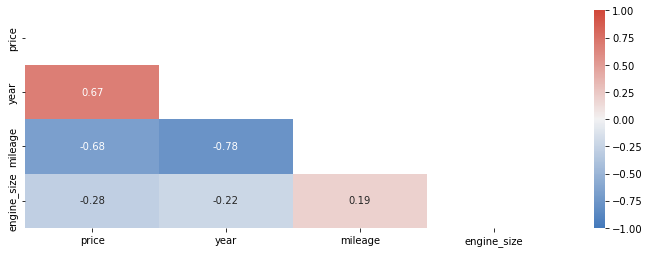

In [18]:
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr1, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(250, 15, as_cmap=True)

plt.figure(figsize=(12, 4))
sns.heatmap(corr1, vmin=-1, vmax=1, annot=True, mask = mask, cmap=cmap)
plt.show()

```
We found that the price variable has a positive correlation with year (0.67) through correlation analysis. That means that a highest year value higher price. Meanwhile, the price exhibited a negative correlation with mileage (-0.68) and engine_size (-0.28) these two variables are inversely proportional to the price.
```

## Pairwise relationship

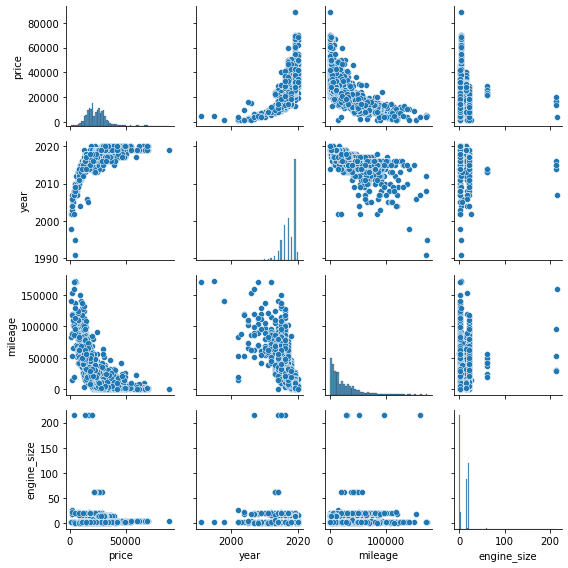

In [19]:
%matplotlib inline

sns.pairplot(df, height=2.0)
plt.tight_layout()

## Relationship between Price and Year variable

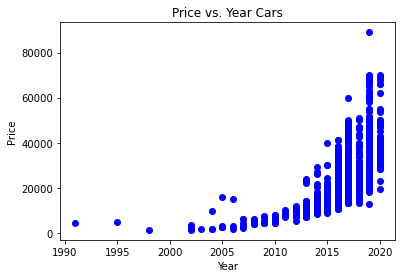

In [20]:
plt.scatter(df.year, df.price, color='blue')
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Price vs. Year Cars')
plt.show()

In [21]:
# find out the indexes of the data with max car price
#df.loc[df['price']>70000].index

# let's drop them
#df.drop(df.loc[df['price']> 70000].index, inplace=True)
#df.drop(df.loc[df['year'] < 2000].index, inplace=True)

## Relationship between Price and Mileage variable

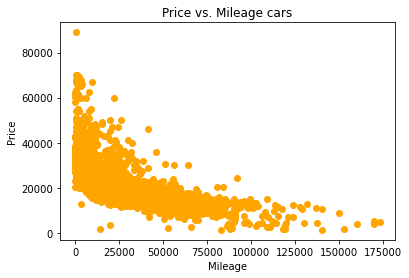

In [22]:
plt.scatter(df.mileage, df.price, color='orange')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Price vs. Mileage cars')
plt.show()

## Relationship between Price and Engine Size variable

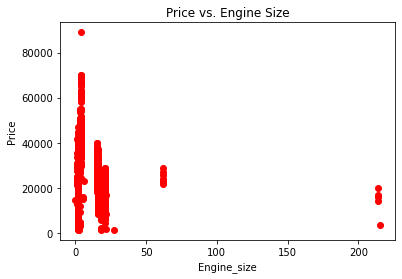

In [23]:
plt.scatter(df.engine_size, df.price, color='red')
plt.xlabel('Engine_size')
plt.ylabel('Price')
plt.title('Price vs. Engine Size')
plt.show()

## Relationship between price year model/ mileage

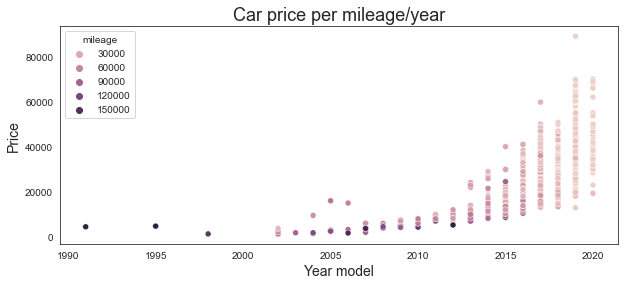

In [24]:
plt.figure(figsize=(10,4))
sns.set_style("white")
ax = sns.scatterplot(x='year', y='price', hue='mileage', data=df)
ax.set_title("Car price per mileage/year", fontsize=18)
ax.set_xlabel("Year model", fontsize=14)
ax.set_ylabel("Price", fontsize=14)
plt.show()

# # 5. Linear Regression Model

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Regression models 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

#train_split_set
from sklearn.model_selection import train_test_split

#performance metric
from sklearn.metrics import mean_squared_error, r2_score


#df1.head()
df.head()

,price,year,mileage,engine_size
0,30495,2020,1200,2.0
1,29989,2020,1000,15.0
2,37899,2020,500,2.0
3,30399,2019,5000,2.0
4,29899,2019,4500,2.0


# Getting features and response variables

In [26]:
response = df['price']
features = df.drop('price', axis = 1)

# Split the data in training and test subsets

In [27]:
#Split the dataset in training and test 
x_train, x_test, y_train, y_test = train_test_split(features, response, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

# Training Linear Regression Model

In [28]:
# create a linear regresion model
model = LinearRegression()

# fit the model
model.fit(x_train, y_train)

## Prediction test subset
pred = model.predict(x_test)

## Calculate the performance metrics

In [29]:
r2 = model.score(x_test, y_test)
print('R^2 is:%.4f' % r2)

rmse  = mean_squared_error(y_test, pred)**0.5
print('RMSE: %.4f' % rmse)

R^2 is:0.5031
RMSE: 6636.2084


# 6. Linear Regression Model with Feature Scaling

In [30]:
# create several list to store the results
method = []
r2_list = []
rmse_list = []

# Append the results of Linear Regression Model
method.append('Normal')
r2_list.append(r2)
rmse_list.append(rmse)

# 6.1 StandardScaler

In [31]:
#Standardize features by removing the mean and scaling to unit variance.
# import the libraries
from sklearn.preprocessing import StandardScaler, MinMaxScaler

response = df['price']
features = df.drop('price', axis = 1)

#fit (train) the StandarScale
ss = StandardScaler()

#scale the features (columns)
zscore = ss.fit_transform(features)

features_ss = pd.DataFrame(zscore, index=features.index, columns=features.columns)
#print(features_ss.head())

#Split the dataset in training and test
x_train_ss, x_test_ss, y_train_ss, y_test_ss = train_test_split(features_ss, 
                                                                response, 
                                                                test_size=0.25, 
                                                                random_state=42)

model_ss = LinearRegression()
model_ss.fit(x_train_ss, y_train_ss)

#getting predicted values
pred_ss = model_ss.predict(x_test_ss)

#R2
r2_ss = model_ss.score(x_test_ss, y_test_ss)
print('R^2_SS: %.4f'% r2_ss)

#RMSE
rmse_ss = mean_squared_error(y_test_ss, pred_ss)**0.5
print('RMSE: %.4f'% rmse_ss)

#Append the results
method.append('StandardScaler')
r2_list.append(r2_ss)
rmse_list.append(rmse_ss)

R^2_SS: 0.5031
RMSE: 6636.2084


# 6.2 MinMaxScaler

In [32]:
#Transform features by scaling each feature to a given range. feature_range=(0, 1)

# features without engine-size
response = df['price']
features = df.drop('price', axis = 1)

#fit (train) the StandarScale
mm = MinMaxScaler()

#scale the features (columns)
minmax = mm.fit_transform(features)

features_mm = pd.DataFrame(minmax, index=features.index, columns=features.columns)
#print(features_mm.head())

#Split the dataset in training and test
x_train_mm, x_test_mm, y_train_mm, y_test_mm = train_test_split(features_mm, 
                                                                response, 
                                                                test_size=0.25, 
                                                                random_state=42)

model_mm = LinearRegression()
model_mm.fit(x_train_mm, y_train_mm)

#getting predicted values
pred_mm = model_mm.predict(x_test_mm)

#R2
r2_mm = model_mm.score(x_test_mm, y_test_mm)
print('R^2: %.4f'% r2_mm)

#RMSE
rmse_mm = mean_squared_error(y_test_mm, pred_mm)**0.5
print('RMSE: %.4f'% rmse_mm)

#Append the results
method.append('MinMaxScaler')
r2_list.append(r2_mm)
rmse_list.append(rmse_mm)

R^2: 0.5031
RMSE: 6636.2084


## Polynomial Regression

In [33]:
# Split the data into training (75%) and testing (25%) sets
y = df["price"]
x = df.drop('price', axis = 1)

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, 
                                                    random_state = 42 )


from sklearn.preprocessing import PolynomialFeatures
# Transform the data to polynomial features
poly_reg = PolynomialFeatures(degree = 4)
X = poly_reg.fit_transform(x)

# Fit the polynomial regression model
reg = LinearRegression().fit(X, y)

# Predict using the polynomial regression model
y_pred = reg.predict(X)

# Calculate RMSE and R2 metrics
y_pred = reg.predict(poly_reg.fit_transform(x_test))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the model coefficients
print("Intercept: ",  reg.intercept_)
#print("Coefficient: ",  lin_reg_2.coef_)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)

#Append the results
method.append('Polynomial')
r2_list.append(r2)
rmse_list.append(rmse)

Intercept:  -17620571.325342633
Root Mean Squared Error:  5733.70638664922
R2 Score:  0.6290561006134965


# Comparing the feature scaling results

In [34]:
results = np.vstack((method, r2_list, rmse_list)).T
results_df = pd.DataFrame(results, columns=['Method','R2','RMSE'])
results_df.sort_values(by=['R2'], ascending=False)

,Method,R2,RMSE
3,Polynomial,0.6290561006134965,5733.70638664922
0,Normal,0.503090425211472,6636.208397483127
1,StandardScaler,0.5030904252114656,6636.2083974831685
2,MinMaxScaler,0.5030904252114625,6636.20839748319


# 7. Ridge and Lasso Regression

In [35]:
from sklearn.linear_model import Ridge, Lasso

In [36]:
# loading the dataset
df.head()

,price,year,mileage,engine_size
0,30495,2020,1200,2.0
1,29989,2020,1000,15.0
2,37899,2020,500,2.0
3,30399,2019,5000,2.0
4,29899,2019,4500,2.0


# 7.1 RIDGE Regression Model

In [37]:
# Features and response variables
y = df['price']
X = df.drop('price', axis = 1)

#Split the data in training and test subsets
X_train_rdg, X_test_rdg, Y_train_rdg, Y_test_rdg = train_test_split(X, y, 
                                                                    test_size = 0.25, 
                                                                    random_state = 42)

# 7.1.1 Tuning alpha parameter in RIDGE linear model

In [38]:
alphas_rdg = 10**np.linspace(5, -2, 20)
alphas_rdg

array([1.00000000e+05, 4.28133240e+04, 1.83298071e+04, 7.84759970e+03,
       3.35981829e+03, 1.43844989e+03, 6.15848211e+02, 2.63665090e+02,
       1.12883789e+02, 4.83293024e+01, 2.06913808e+01, 8.85866790e+00,
       3.79269019e+00, 1.62377674e+00, 6.95192796e-01, 2.97635144e-01,
       1.27427499e-01, 5.45559478e-02, 2.33572147e-02, 1.00000000e-02])

In [39]:
ridge = Ridge()
coefs = []

for a in alphas_rdg:
    ridge.set_params(alpha = a)
    ridge.fit(X,y)
    coefs.append(ridge.coef_)

np.shape(coefs)

(20, 3)

# 7.1.2 The weight of each parameter based on the alpha values

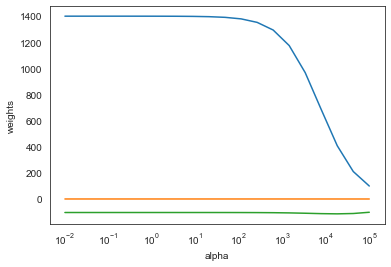

In [40]:
plt.plot(alphas_rdg, coefs)
ax = plt.gca()
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

# 7.1.3 Finding the optimal alpha value to the Ridge regression

In [41]:
rmse_list_alpha = []
r2_list_alpha = []
r2_train_list_alpha = []

for a in alphas_rdg:
    ridge = Ridge(alpha = a, max_iter=1000)
    ridge.fit(X_train_rdg, Y_train_rdg)
    pred = ridge.predict(X_test_rdg)
    
    r2_train_list_alpha.append(ridge.score(X_train_rdg, Y_train_rdg))
    r2_list_alpha.append(ridge.score(X_test_rdg,Y_test_rdg))
    rmse_r = mean_squared_error(Y_test_rdg, pred)**0.5
    rmse_list_alpha.append(rmse_r)
    #print('RMSE: %.2f'% rmse)
    
ridge_result = np.vstack((alphas_rdg, r2_train_list_alpha, r2_list_alpha, rmse_list_alpha)).T
ridge_df = pd.DataFrame(ridge_result, columns=['Alphas','R2 Train', 'R2 Test', 'RMSE'])
ridge_df.sort_values(by=['R2 Test'], ascending=False)

,Alphas,R2 Train,R2 Test,RMSE
19,0.010000,0.543884,0.503090,6636.208419
18,0.023357,0.543884,0.503090,6636.208449
17,0.054556,0.543884,0.503090,6636.208517
16,0.127427,0.543884,0.503090,6636.208676
15,0.297635,0.543884,0.503090,6636.209049
14,0.695193,0.543884,0.503090,6636.209921
13,1.623777,0.543884,0.503090,6636.211968
12,3.792690,0.543884,0.503089,6636.216801
11,8.858668,0.543884,0.503087,6636.228378
10,20.691381,0.543884,0.503083,6636.256977


In [42]:
# find out the coefficient for the best result
#Split the data in training and test subsets
#X_train_rdg, X_test_rdg, Y_train_rdg, Y_test_rdg = train_test_split(X, y, test_size = 0.2, random_state = 42)

ridge = Ridge(alpha = 0.010000)
ridge.fit(X_train_rdg, Y_train_rdg)
pred = ridge.predict(X_test_rdg)

r2_ridge = ridge.score(X_test_rdg, Y_test_rdg)
rmse_ridge =  mean_squared_error(Y_test_rdg, pred)**0.5

print('R2 in Test Set:   %.4f'% ridge.score(X_test_rdg, Y_test_rdg))
print('RMSE in Test Set: %.4f'% mean_squared_error(Y_test_rdg, pred)**0.5)

# Append the results of RIDGE Regression Model
method.append('RIDGE')
r2_list.append(r2_ridge)
rmse_list.append(rmse_ridge)

R2 in Test Set:   0.5031
RMSE in Test Set: 6636.2084


# 7.2 LASSO regression model

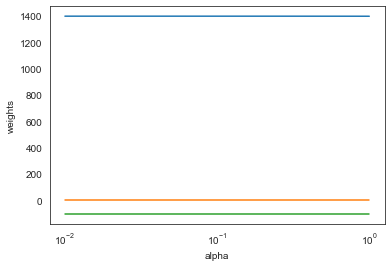

In [43]:
# Features and response variables
y = df.price
X = df.drop('price', axis = 1)

#Split the data in training and test subsets
X_train_lss, X_test_lss, Y_train_lss, Y_test_lss = train_test_split(X, y, 
                                                                    test_size = 0.25, 
                                                                    random_state = 42)

alphas_lss = np.linspace(1, 0.01, 20)

# Tuning alpha parameter in LASSO linear model
lasso = Lasso()
coefs = []

for a in alphas_lss:
    lasso.set_params(alpha = a)
    lasso.fit(X,y)
    coefs.append(lasso.coef_)

np.shape(coefs)

# # The weight of each parameter based on the alpha values
plt.plot(alphas_lss, coefs)
ax = plt.gca()
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.show()

# 7.2.1 Finding the optimal alpha value to the Lasso regression

In [44]:
rmse_list_ls = []
r2_list_ls = []
r2_train_list_ls = []

for a in alphas_lss:
    lasso = Lasso(alpha = a, max_iter=1000)
    lasso.fit(X_train_lss, Y_train_lss)
    pred = lasso.predict(X_test_lss)
    
    r2_train_list_ls.append(lasso.score(X_train_lss, Y_train_lss))
    r2_list_ls.append(lasso.score(X_test_lss,Y_test_lss))
    rmse_ls = mean_squared_error(Y_test_lss, pred)**0.5
    rmse_list_ls.append(rmse_ls)
    #print('RMSE: %.2f'% rmse)
    
lasso_result = np.vstack((alphas_lss, r2_train_list_ls, r2_list_ls, rmse_list_ls)).T
lasso_df = pd.DataFrame(lasso_result, columns=['Alphas','R2 Train', 'R2 Test', 'rmse'])
lasso_df.sort_values(by=['R2 Test'], ascending=False)

,Alphas,R2 Train,R2 Test,rmse
0,1.000000,0.543884,0.503091,6636.206459
1,0.947895,0.543884,0.503091,6636.206556
2,0.895789,0.543884,0.503091,6636.206653
3,0.843684,0.543884,0.503091,6636.206769
4,0.791579,0.543884,0.503091,6636.206866
5,0.739474,0.543884,0.503091,6636.206964
6,0.687368,0.543884,0.503091,6636.207061
7,0.635263,0.543884,0.503091,6636.207159
8,0.583158,0.543884,0.503091,6636.207258
9,0.531053,0.543884,0.503091,6636.207356


In [45]:
# find out the coefficient of the best result obtained from our lasso

lasso = Lasso(alpha = 1.00)
lasso.fit(X_train_lss, Y_train_lss)
pred_lss = lasso.predict(X_test_lss)

r2_lasso = lasso.score(X_test_lss, Y_test_lss)
rmse_lasso =  mean_squared_error(Y_test_lss, pred_lss)**0.5

print('R2 in Test Set: %.4f'% lasso.score(X_test_lss, Y_test_lss))
print('RMSE in Test Set: %.4f' % mean_squared_error(Y_test_lss, pred_lss)**0.5)

# Append the results of Linear Regression Model
method.append('LASSO')
r2_list.append(r2_lasso)
rmse_list.append(rmse_lasso)

R2 in Test Set: 0.5031
RMSE in Test Set: 6636.2065


# 7.3 Comparing find the best R^2 and RMSE score

In [46]:
results = np.vstack((method, r2_list, rmse_list)).T
results_df = pd.DataFrame(results, columns=['Method','R2','RMSE'])
results_df.sort_values(by=['R2'], ascending=False)

,Method,R2,RMSE
3,Polynomial,0.6290561006134965,5733.70638664922
5,LASSO,0.5030907155244349,6636.206458923577
0,Normal,0.503090425211472,6636.208397483127
1,StandardScaler,0.5030904252114656,6636.2083974831685
2,MinMaxScaler,0.5030904252114625,6636.20839748319
4,RIDGE,0.503090421937948,6636.208419342021


## The best regression model with polynomial feature

In [47]:
# Split the data into training (75%) and testing (25%) sets
y = df["price"]
x = df.drop('price', axis = 1)

# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, 
                                                    random_state = 42)


from sklearn.preprocessing import PolynomialFeatures
# Transform the data to polynomial features
poly_reg = PolynomialFeatures(degree = 4, include_bias=False)
X = poly_reg.fit_transform(x)

# Fit the polynomial regression model
reg = LinearRegression().fit(X, y)

# Predict using the polynomial regression model
y_pred = reg.predict(X)

# Calculate RMSE and R2 metrics
y_pred = reg.predict(poly_reg.fit_transform(x_test))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print the model coefficients
print("Intercept: ",  reg.intercept_)
#print("Coefficient: ",  lin_reg_2.coef_)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)

Intercept:  -301323.6132836064
Root Mean Squared Error:  5757.104332330597
R2 Score:  0.6260224488030507


# 7.4 The coefficient of determination

In [48]:
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficient of determination: 0.63


# 8. Visualizating the best regression model

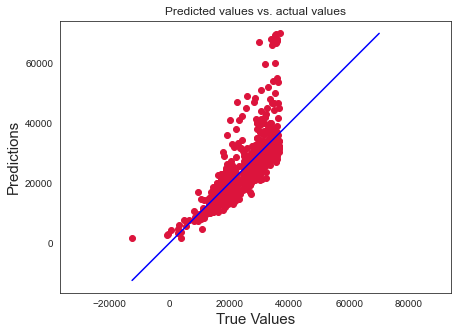

In [49]:
plt.figure(figsize=(7,5))
actual_values = y_test
plt.scatter(y_pred, actual_values, c='crimson')

p1 = max(max(y_pred), max(actual_values))
p2 = min(min(y_pred), min(actual_values))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title('Predicted values vs. actual values')
plt.axis('equal')
plt.show()